In [ ]:
from PIL import Image
import os
import cv2
import pandas as pd
from skimage.filters import gabor
import numpy as np
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)

In [ ]:
image_directory = '/content/drive/MyDrive/segmentated images'
SIZE = 512
image_dataset = []
images = os.listdir(image_directory)
for i, image_name in enumerate(images):
    if image_name.split('.')[1] == 'png':
        image = cv2.imread(os.path.join(image_directory, image_name), cv2.IMREAD_COLOR)
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Read as RGB image
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

image_dataset = np.array(image_dataset).astype(np.float32) / 255.0  # Normalize to [0, 1]
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # Add more extensions if needed

# Generate image_paths by filtering valid image file extensions
image_paths = [os.path.join(image_directory, filename) for filename in os.listdir() if filename.lower().endswith(valid_extensions)]

# Loop through the image_paths and process each image
for image_path in image_paths:

    # Process the single image
    image = load_and_preprocess_image(image_path)

In [ ]:
import cv2

def extract_shape_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours in the grayscale image
    contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    shape_features_list = []

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        # Create a dictionary to store the features for this object
        shape_features = {
            'Area': area,
            'Perimeter': perimeter,
            # Add any other shape-based features you need to calculate here
        }

        # Append the features for this object to the list
        shape_features_list.append(shape_features)

    return shape_features_list


In [ ]:
import cv2
import pandas as pd
import numpy as np

# Define the pixel-to-millimeter conversion factor (e.g., 1 pixel = 0.1 mm)
pixel_to_mm = 0.1  # Adjust this value according to your specific image scale

def extract_shape_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours in the grayscale image
    contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    shape_features_list = []

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour) * (pixel_to_mm ** 2)  # Convert to mm^2
        perimeter = cv2.arcLength(contour, True) * pixel_to_mm  # Convert to mm

        # Create a dictionary to store the features for this object
        shape_features = {
            'Area (mm^2)': area,
            'Perimeter (mm)': perimeter,
            # Add any other shape-based features you need to calculate here
        }

        # Append the features for this object to the list
        shape_features_list.append(shape_features)

    return shape_features_list

# Call the function with your image
image = cv2.imread('/content/drive/MyDrive/Diseased/GRAD A segmented image/A117.png')  # Replace 'your_image.jpg' with the path to your image
features_list = extract_shape_features(image)

# Print the list
for features in features_list:
    print("Area (mm^2):", features['Area (mm^2)'])
    print("Perimeter (mm):", features['Perimeter (mm)'])
    print()

Area (mm^2): 5.6400000000000015
Perimeter (mm): 13.953910326957704

Area (mm^2): 3.545000000000001
Perimeter (mm): 11.701219260692596

Area (mm^2): 39.21000000000001
Perimeter (mm): 28.42497802972794

Area (mm^2): 29.970000000000006
Perimeter (mm): 27.279393708705904

Area (mm^2): 1248.8800000000003
Perimeter (mm): 141.16568541526794

Area (mm^2): 1944.8100000000004
Perimeter (mm): 176.4



Area (mm^2): 14.915000000000003
Perimeter (mm): 18.56396088600159

Area (mm^2): 18.200000000000003
Perimeter (mm): 22.299494802951813

Area (mm^2): 59.31000000000001
Perimeter (mm): 45.019090557098394

Area (mm^2): 112.36000000000003
Perimeter (mm): 56.13036031723023

Area (mm^2): 11.575000000000003
Perimeter (mm): 17.061017119884493

Area (mm^2): 44.17500000000001
Perimeter (mm): 36.897770166397095



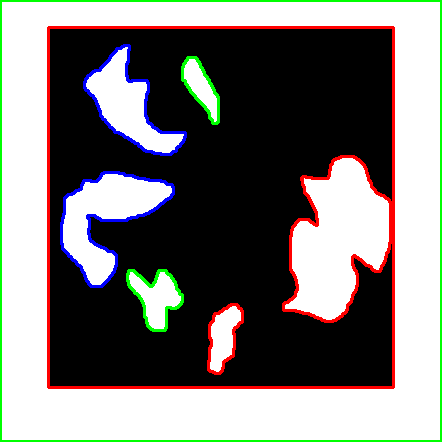

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define the pixel-to-millimeter conversion factor (e.g., 1 pixel = 0.1 mm)
pixel_to_mm = 0.1  # Adjust this value according to your specific image scale

def extract_shape_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours in the grayscale image
    contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    shape_features_list = []

    colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # List of BGR colors (Red, Green, Blue)

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour) * (pixel_to_mm ** 2)  # Convert to mm^2
        perimeter = cv2.arcLength(contour, True) * pixel_to_mm  # Convert to mm

        # Create a dictionary to store the features for this object
        shape_features = {
            'Area (mm^2)': area,
            'Perimeter (mm)': perimeter,
            # Add any other shape-based features you need to calculate here
        }

        # Append the features for this object to the list
        shape_features_list.append(shape_features)

        # Draw the contour with a different color
        color = colors[i % len(colors)]  # Cycle through colors
        cv2.drawContours(image, [contour], -1, color, 2)

    return shape_features_list, image

# Call the function with your image
image = cv2.imread('/content/drive/MyDrive/Diseased/GRAD D segmented image/D1.png')  # Replace 'your_image.jpg' with the path to your image
features_list, image_with_contours = extract_shape_features(image)

# Print the list
for features in features_list[:-2]:
    print("Area (mm^2):", features['Area (mm^2)'])
    print("Perimeter (mm):", features['Perimeter (mm)'])
    print()

# Display the image with contours using cv2_imshow
cv2_imshow(image_with_contours)




In [ ]:
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

# Define the pixel-to-millimeter conversion factor (e.g., 1 pixel = 0.1 mm)
pixel_to_mm = 0.1  # Adjust this value according to your specific image scale

def extract_shape_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours in the grayscale image
    contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    shape_features_list = []

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour) * (pixel_to_mm ** 2)  # Convert to mm^2
        perimeter = cv2.arcLength(contour, True) * pixel_to_mm  # Convert to mm

        # Create a dictionary to store the features for this object
        shape_features = {
            'Area (mm^2)': area,
            'Perimeter (mm)': perimeter,
            # Add any other shape-based features you need to calculate here
        }

        # Append the features for this object to the list
        shape_features_list.append(shape_features)

        # Draw the contour on the image
        cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)  # Red color, thickness=2

    return shape_features_list, image

# Call the function with your image
image = cv2.imread('/content/aug_0_9544.png')  # Replace 'your_image.jpg' with the path to your image
features_list, image_with_contours = extract_shape_features(image)
for features in features_list[:-2]:
    print("Area (mm^2):", features['Area (mm^2)'])
    print("Perimeter (mm):", features['Perimeter (mm)'])
    print()

Area (mm^2): 2.4150000000000005
Perimeter (mm): 6.687005722522736

Area (mm^2): 315.4050000000001
Perimeter (mm): 146.306096303463

Area (mm^2): 1.3350000000000002
Perimeter (mm): 4.921320307254792

Area (mm^2): 2.1950000000000003
Perimeter (mm): 8.018376529216766



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import pandas as pd

# Define the pixel-to-millimeter conversion factor (e.g., 1 pixel = 0.1 mm)
pixel_to_mm = 0.1  # Adjust this value according to your specific image scale

def extract_shape_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours in the grayscale image
    contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    shape_features_list = []

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour) * (pixel_to_mm ** 2)  # Convert to mm^2
        perimeter = cv2.arcLength(contour, True) * pixel_to_mm  # Convert to mm

        # Create a dictionary to store the features for this object
        shape_features = {
            'Area (mm^2)': area,
            'Perimeter (mm)': perimeter,
            # Add any other shape-based features you need to calculate here
        }

        # Append the features for this object to the list
        shape_features_list.append(shape_features)

    return shape_features_list

# Specify the directory containing your image files
image_dir = '/content/drive/MyDrive/GRAD D segmented image'

# Create an empty DataFrame to store the shape features
result_df = pd.DataFrame(columns=['Image', 'Object', 'Area (mm^2)', 'Perimeter (mm)'])

# Iterate through image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image file
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        features_list = extract_shape_features(image)

        for i, features in enumerate(features_list[:-2]):
            result_df = result_df.append({
                'Image': filename,
                'Object': i + 1,
                'Area (mm^2)': features['Area (mm^2)'],
                'Perimeter (mm)': features['Perimeter (mm)']
            }, ignore_index=True)

# Save the DataFrame to an Excel file
result_df.to_excel('shape_features.csv', index=False)


<ipython-input-2-1cf3a3c1037c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-2-1cf3a3c1037c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-2-1cf3a3c1037c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-2-1cf3a3c1037c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-2-1cf3a3c1037c>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.appe

ValueError: ignored